<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch9_Forecasting_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ice = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/forecast2.xlsx', sheet_name="IceCream")

In [ ]:
ice.head()

,Date,Ice Cream in Kilolitres
0,2010-01,19027
1,2010-02,17815
2,2010-03,23490
3,2010-04,24151
4,2010-05,32075


## Autoregressive Integrated Moving Average (ARIMA)

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

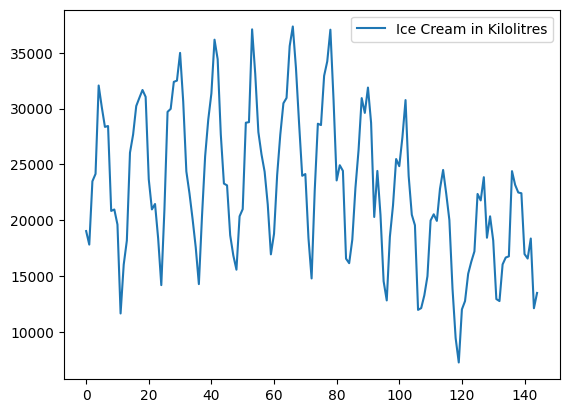

In [ ]:
ice.plot()
plt.show()

Check Autocorrelation to decide on lags

Shows exponential decay - Time series is stationary. Use an
Autoregressive model. \\
Long runs of positive autocorrelations - Apply extra differencing. \\
Slowly declines, there are significant values at large
lags or noteworthy spikes -  Include further moving average terms. \\
Lag 1 is coming to the value of -0.5 could be the result of overdifferencing. - Decrease the order of differencing. \\


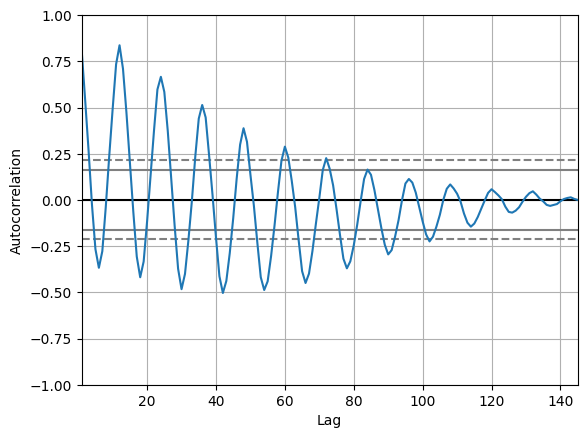

In [ ]:
autocorrelation_plot(ice["Ice Cream in Kilolitres"])
plt.show()

Order = Autoregressive (number of time lags), dfferences (number of times the data have had past values subtracted), moving average (periods)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
len(ice)

145

In [ ]:
train = ice["Ice Cream in Kilolitres"][:125]
test = ice["Ice Cream in Kilolitres"][125:]

In [ ]:
AR = ARIMA(train, order=(1,0,0))

In [ ]:
mod = AR.fit()

In [ ]:
mod.params

const     2.363166e+04
ar.L1     8.143554e-01
sigma2    1.528857e+07
dtype: float64

In [ ]:
train_pred = mod.predict()
train_pred

0      23631.663985
1      19881.830869
2      18894.832089
3      23516.299150
4      24054.588088
           ...     
120    10287.909557
121    14162.612689
122    14770.121839
123    16760.406508
124    17646.425215
Name: predicted_mean, Length: 125, dtype: float64

In [ ]:
error = train - train_pred

In [ ]:
def MAPE(y_true, y_predict):
    return np.mean((np.absolute(y_true - y_predict))/y_true *100)

In [ ]:
100-MAPE(train, train_pred)

84.56787217935762

In [ ]:
test

125    22355
126    21773
127    23856
128    18429
129    20348
130    18180
131    12932
132    12751
133    16039
134    16655
135    16760
136    24398
137    23168
138    22486
139    22416
140    16965
141    16562
142    18359
143    12109
144    13480
Name: Ice Cream in Kilolitres, dtype: int64

In [ ]:
test_pred = []

for i in range(125, 145):
    x = mod.predict(i)
    test_pred.append([x])

In [ ]:
test_pred

array([18397.26092128, 19368.99943104, 20160.33996229, 20804.77242031,
       21329.56949129, 21756.94083531, 22104.97300961, 22388.39490032,
       22619.20105579, 22807.1593016 , 22960.22411955, 23084.87328508,
       23186.38200978, 23269.04619086, 23336.36421552, 23391.1850144 ,
       23435.8286296 , 23472.18440001, 23501.79091904, 23525.90114855])

In [ ]:
test_pred = np.array(test_pred).reshape(-1)
error = np.subtract(test, test_pred)

In [ ]:
100-MAPE(test, test_pred)

68.40031662802593

PRACTICE

In [ ]:
unem = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/forecast2.xlsx', sheet_name="Unemployment")

In [ ]:
unem.head()

,Date,Unemployment
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


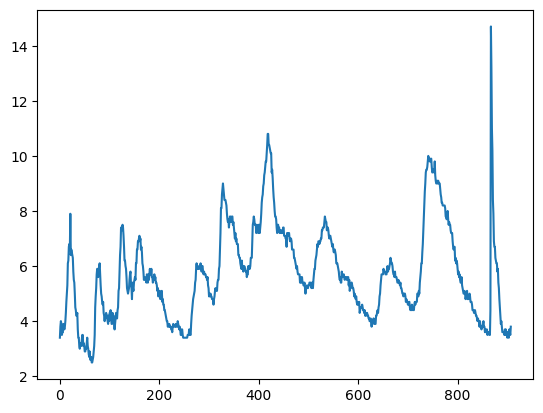

In [ ]:
plt.plot(unem["Unemployment"])
plt.show()

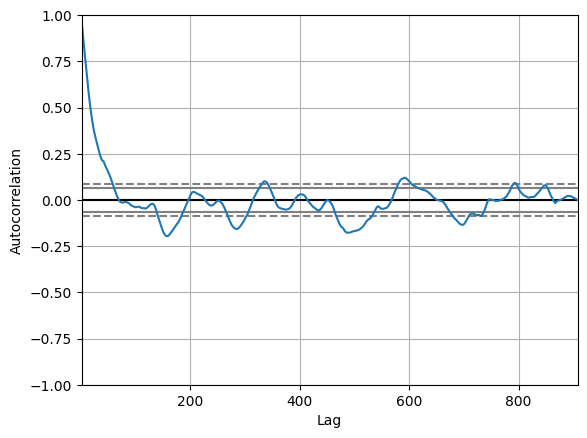

In [ ]:
autocorrelation_plot(unem["Unemployment"])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
len(unem["Unemployment"])

908

In [ ]:
train = unem["Unemployment"][:800]
test = unem["Unemployment"][800:]

In [ ]:
AR = ARIMA(train, order=(20,0,7))

In [ ]:
mod = AR.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
train_pred = mod.predict()
train_pred

0      5.771493
1      3.411127
2      3.860681
3      4.144388
4      4.034833
         ...   
795    6.560727
796    6.137906
797    6.190569
798    6.123335
799    6.193303
Name: predicted_mean, Length: 800, dtype: float64

In [ ]:
error = train - train_pred

In [ ]:
def MAPE(y_true, y_predict):
    return np.mean((np.absolute(y_true - y_predict))/y_true *100)

In [ ]:
100-MAPE(train, train_pred)

97.36163798756431

In [ ]:
test

800    5.9
801    5.7
802    5.8
803    5.6
804    5.7
      ... 
903    3.4
904    3.7
905    3.6
906    3.5
907    3.8
Name: Unemployment, Length: 108, dtype: float64

In [ ]:
test_pred = []

for i in range(800, 908):
    x = mod.predict(i)
    test_pred.append([x])

In [ ]:
test_pred = np.array(test_pred).reshape(-1)
error = np.subtract(test, test_pred)

In [ ]:
100-MAPE(test, test_pred)

61.043050400907546

## SARIMA

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
train = ice["Ice Cream in Kilolitres"][:125]
test = ice["Ice Cream in Kilolitres"][125:]

In [ ]:
SAR = SARIMAX(train, seasonal_order=(1,0,0,12))

In [ ]:
mod = SAR.fit()

In [ ]:
train_pred = mod.predict()
train_pred

0          0.000000
1      18044.672287
2      17016.378637
3      22135.313478
4      22762.839339
           ...     
120     8343.737877
121    13201.658224
122    16568.438993
123    15669.246256
124    15799.107606
Name: predicted_mean, Length: 125, dtype: float64

In [ ]:
error = train - train_pred

In [ ]:
100-MAPE(train, train_pred)

87.97458920156693

In [ ]:
test_pred = []

for i in range(125, 145):
    x = mod.predict(i)
    test_pred.append([x])

In [ ]:
test_pred = np.array(test_pred).reshape(-1)
error = np.subtract(test, test_pred)

In [ ]:
100-MAPE(test, test_pred)

67.46247509132414

### Evaluating SARIMA Model

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

In [ ]:
ice['Date'] = pd.to_datetime(ice['Date'])

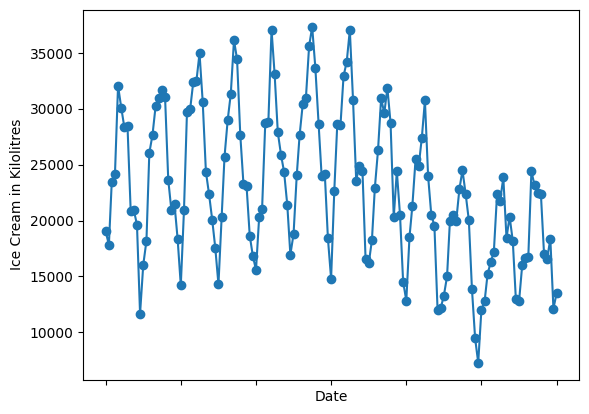

In [ ]:
plt.plot(ice["Date"], ice["Ice Cream in Kilolitres"], linestyle="solid", marker='o')
plt.xlabel('Date')
plt.tick_params(labelbottom= False)
plt.ylabel('Ice Cream in Kilolitres')
plt.show()

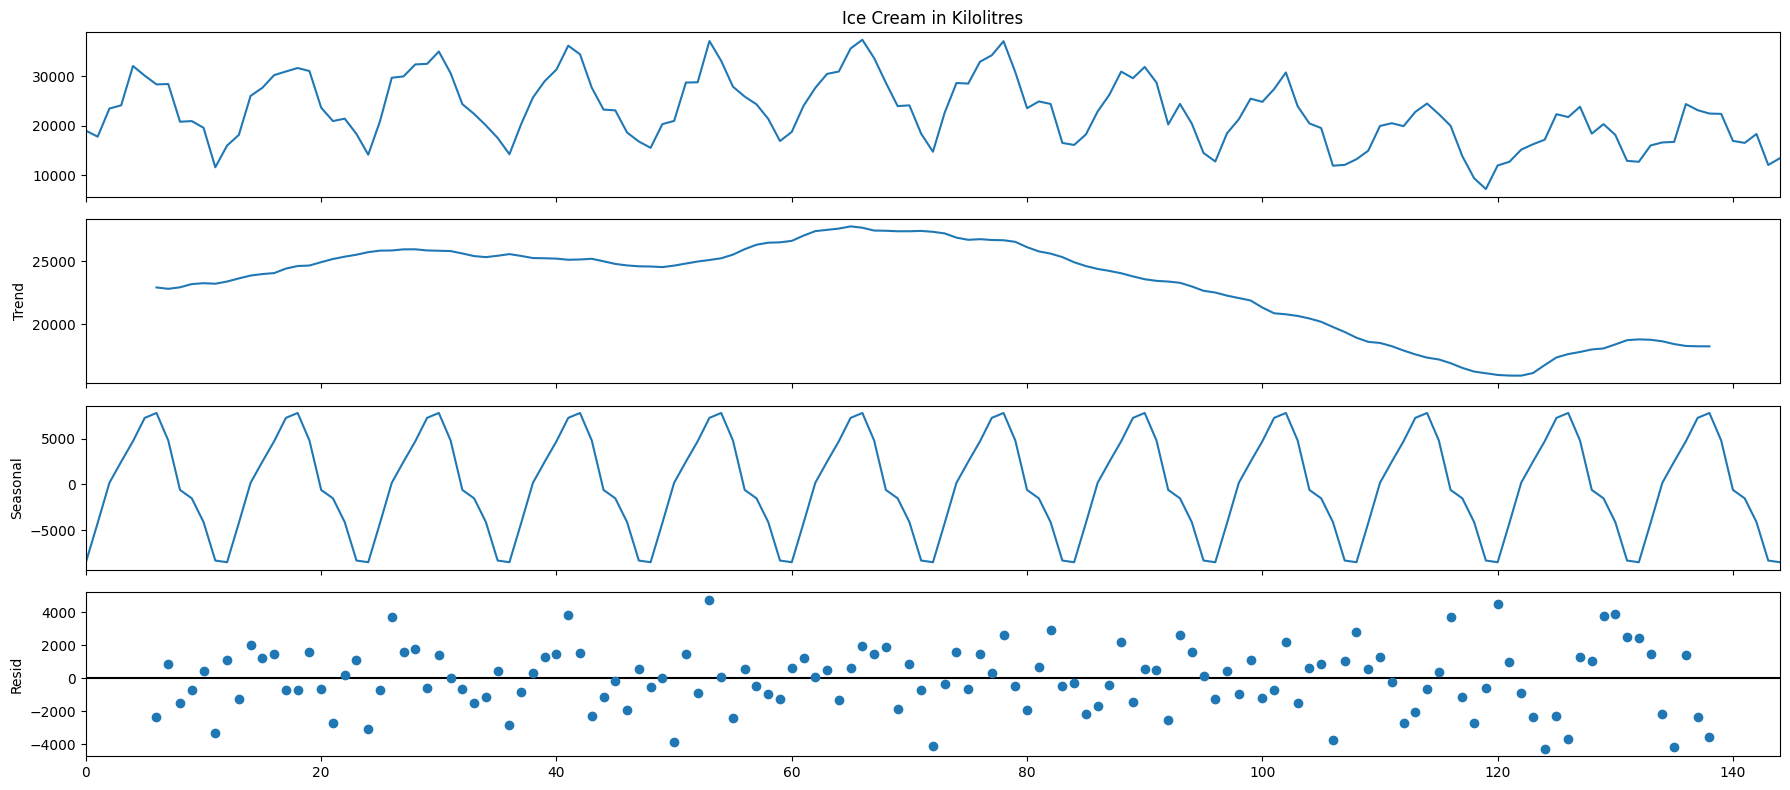

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ice["Ice Cream in Kilolitres"], model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(ice["Ice Cream in Kilolitres"]))

Results of Dickey-Fuller Test:
Test Statistic                  -0.656101
p-value                          0.857795
#Lags Used                      14.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                  -0.656101
p-value                          0.857795
#Lags Used                      14.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64
None


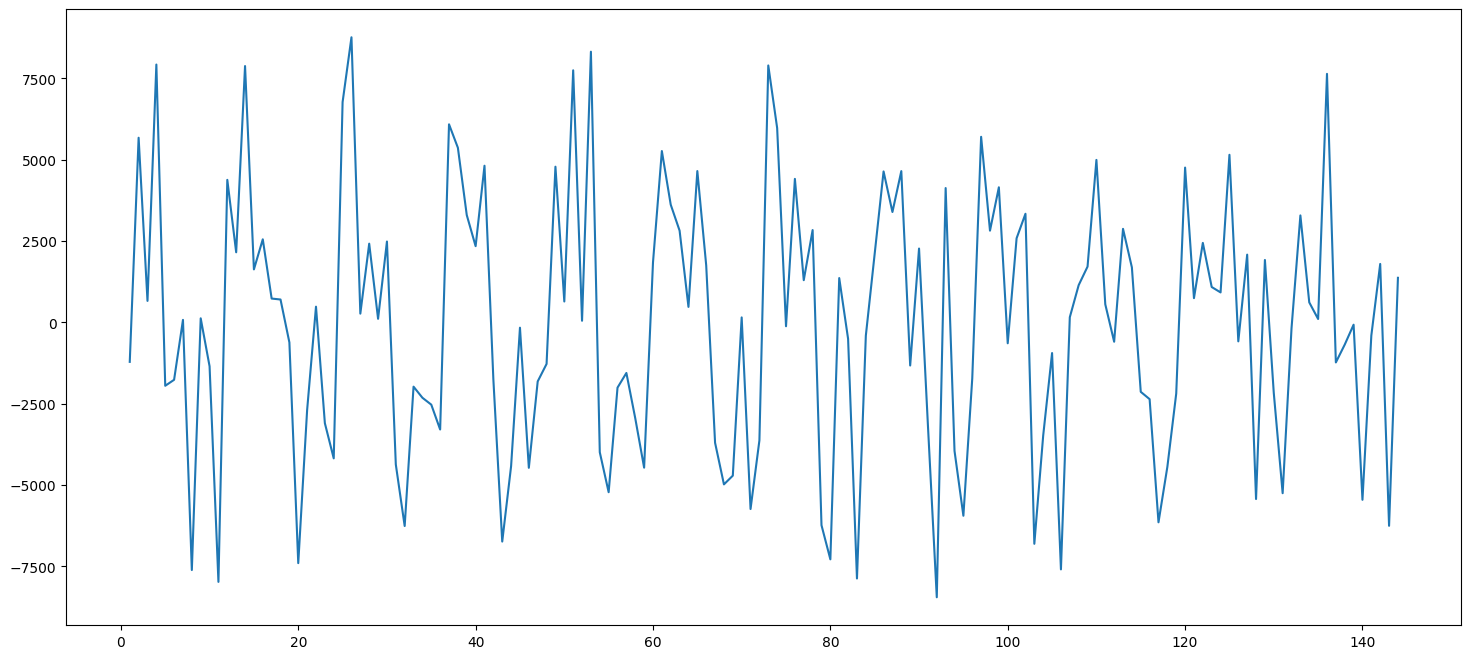

In [ ]:
ts_t_adj = ice["Ice Cream in Kilolitres"] - ice["Ice Cream in Kilolitres"].shift(1)
ts_t_adj = ts_t_adj.dropna()
ts_t_adj.plot()

print(adf_test(ice["Ice Cream in Kilolitres"]))

<Axes: >

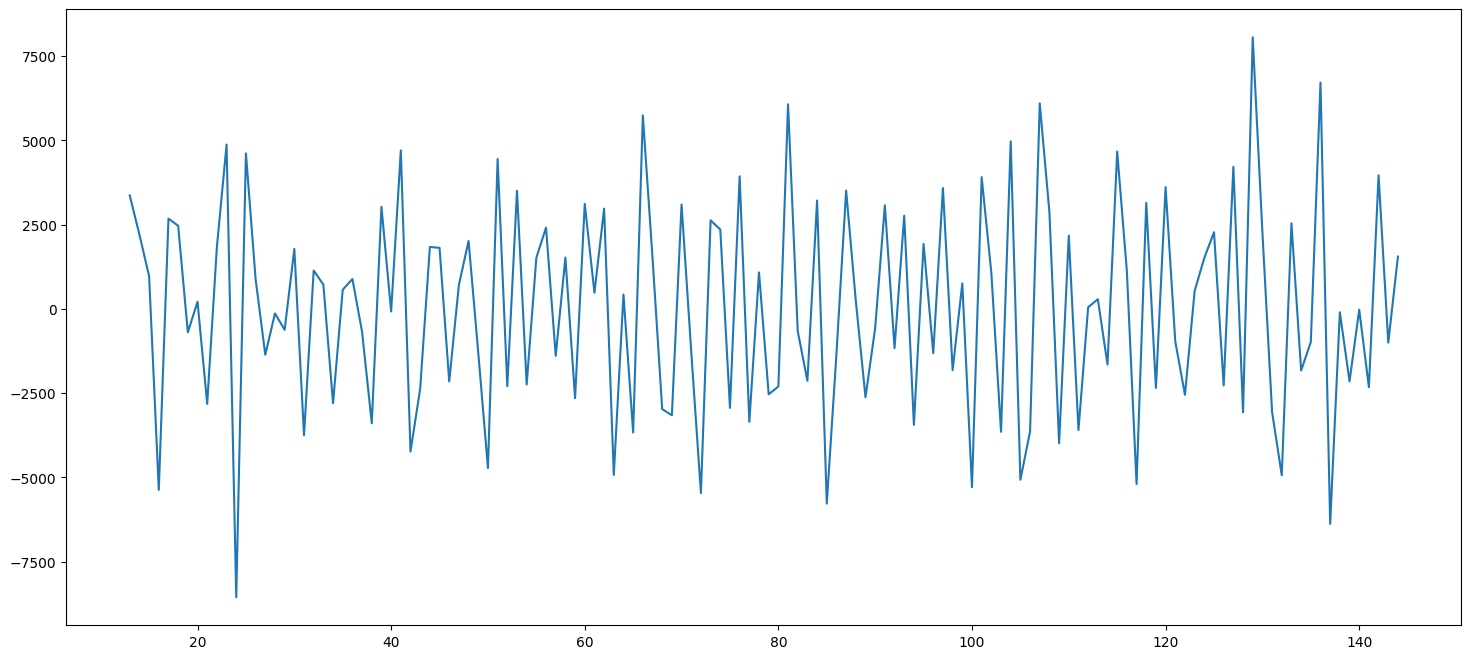

In [ ]:
ts_s_adj = ts_t_adj - ts_t_adj.shift(12)
ts_s_adj = ts_s_adj.dropna()
ts_s_adj.plot()

In [ ]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


## Facebook Prophet

Prophet is a procedure for univariate (one variable) time series forecasting data based on an additive model, and the implementation supports trends, seasonality, and holidays. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [ ]:
!pip install prophet

In [ ]:
import prophet